# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Visualize a story in Tableau and Python**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/. Note that the TikTok dataset can be downloaded directly from this notebook by going to "Lab Files" in the menu bar at the top of the page, clicking into the "/home/jovyan/work" folder, selecting `tiktok_dataset.csv`, and clicking "Download" above the list of files. 

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [7]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [8]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [3]:
# Display and examine the first few rows of the dataframe
### YOUR CODE HERE ###
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
### YOUR CODE HERE ###
data.size


232584

In [5]:
# Get the shape of the data
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get basic information about the data, using `.info()`.

In [6]:
# Get basic information about the data
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [7]:
# Generate a table of descriptive statistics
### YOUR CODE HERE ###
data.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


==> ENTER YOUR RESPONSE HERE

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

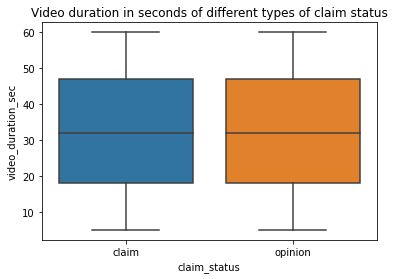

In [20]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
sns.boxplot(x=data['claim_status'],
            y=data['video_duration_sec'],
            showfliers=False)
plt.title('Video duration in seconds of different types of claim status')
plt.show()


Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

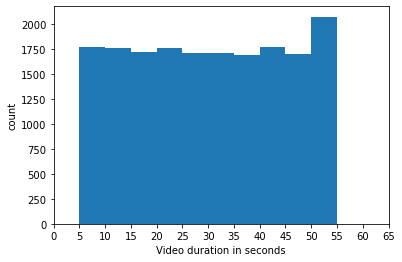

In [19]:
# Create a histogram
### YOUR CODE HERE ###
plt.hist(data['video_duration_sec'], bins=range(5, 60, 5))
plt.xticks(range(0, 70, 5))

plt.xlabel('Video duration in seconds')
plt.ylabel('count')
plt.show()

**Question:** What do you notice about the duration and distribution of the videos?

Distribution is uniform, videos were selected pretty evenly when compared to claim status as well. Only slighty more videos on the longer end of duration, 50+ seconds. About 300 more

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

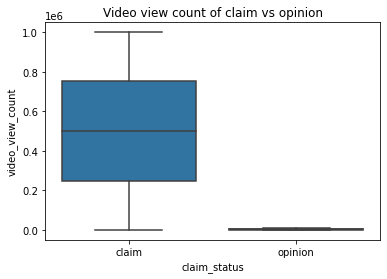

In [34]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###

sns.boxplot(x=data['claim_status'],
            y=data['video_view_count'],
            showfliers=False)
plt.title('Video view count of claim vs opinion')
plt.show()


In [59]:
dataNA[top_off]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
22,23,claim,7986031283,52,"someone shared with me that about once a year,...",not verified,banned,60096.0,34245.0,11345.0,219.0,77.0
26,27,claim,2385469584,10,someone shared with me that people are born wi...,not verified,under review,50892.0,7976.0,2903.0,125.0,78.0
29,30,claim,6854087993,48,"someone shared with me that at birth, baby pan...",not verified,active,74323.0,20940.0,3678.0,274.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0


In [55]:
dataNA = data.dropna()
top_off = dataNA['video_view_count'] < 100000

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

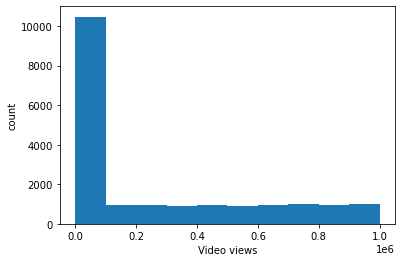

In [35]:
# Create a histogram
### YOUR CODE HERE ###
plt.hist(data['video_view_count'])


plt.xlabel('Video views')
plt.ylabel('count')
plt.show()

In [43]:
views_mask = (data['video_view_count'] > 500000) & (data['claim_status'] == 'opinion')

In [52]:
opinion = data['claim_status'] == 'opinion'
claim = data['claim_status'] == 'claim'
data[opinion].describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,9476.000000,9.476000e+03,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000
mean,14346.500000,5.622382e+09,32.359856,4956.432250,1092.729844,217.145631,13.677290,2.697446
std,2735.629909,2.530209e+09,16.281705,2885.907219,964.099816,252.269583,16.200652,4.089288
min,9609.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,11977.750000,3.448802e+09,18.000000,2467.000000,289.000000,34.000000,2.000000,0.000000
50%,14346.500000,5.611857e+09,32.000000,4953.000000,823.000000,121.000000,7.000000,1.000000
75%,16715.250000,7.853243e+09,47.000000,7447.250000,1664.000000,314.000000,19.000000,3.000000
max,19084.000000,9.999835e+09,60.000000,9998.000000,4375.000000,1674.000000,101.000000,32.000000


In [47]:
claim = data['claim_status'] == 'claim'
data[claim].describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,9608.000000,9.608000e+03,9608.000000,9608.000000,9608.000000,9608.000000,9608.000000,9608.000000
mean,4804.500000,5.627264e+09,32.486886,501029.452748,166373.331182,33026.416216,2070.952227,691.164863
std,2773.735027,2.543869e+09,16.172409,291349.239825,147623.370888,38781.676825,2424.381846,1017.216834
min,1.000000,1.236285e+09,5.000000,1049.000000,0.000000,0.000000,0.000000,0.000000
25%,2402.750000,3.400723e+09,18.000000,247003.750000,43436.750000,5062.250000,324.750000,68.000000
50%,4804.500000,5.607672e+09,32.000000,501555.000000,123649.000000,17997.500000,1139.500000,286.000000
75%,7206.250000,7.834910e+09,47.000000,753088.000000,255715.250000,47256.000000,2935.500000,886.000000
max,9608.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


**Question:** What do you notice about the distribution of this variable?

claims have 100 times more views on average than opinions

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

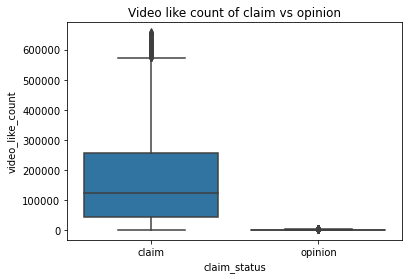

In [64]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###

sns.boxplot(x=dataNA['claim_status'],
            y=dataNA['video_like_count'],
            showfliers=True)
plt.title('Video like count of claim vs opinion')
plt.show()

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

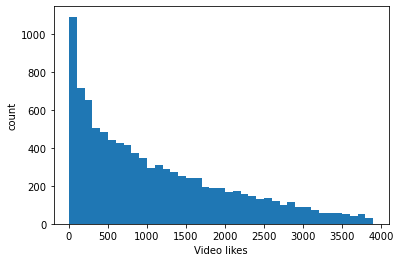

In [78]:
# Create a histogram
### YOUR CODE HERE ###


plt.hist(dataNA['video_like_count'], bins=range(0, 4000, 100))


plt.xlabel('Video likes')
plt.ylabel('count')
plt.show()

**Question:** What do you notice about the distribution of this variable?

on par with view count

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

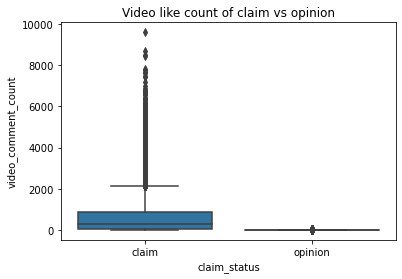

In [80]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###

sns.boxplot(x=dataNA['claim_status'],
            y=dataNA['video_comment_count'],
            showfliers=True)
plt.title('Video like count of claim vs opinion')
plt.show()

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

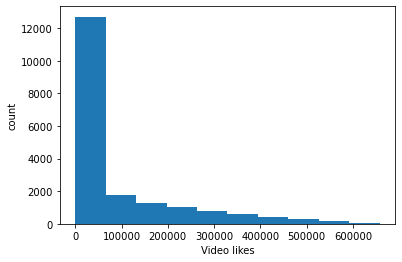

In [81]:
# Create a histogram
### YOUR CODE HERE ###
plt.hist(dataNA['video_like_count'], )


plt.xlabel('Video likes')
plt.ylabel('count')
plt.show()

**Question:** What do you notice about the distribution of this variable?

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

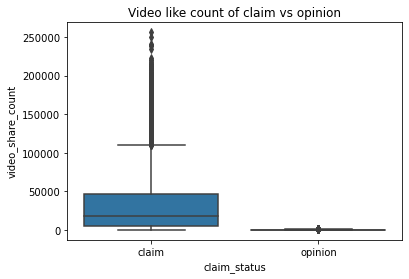

In [82]:
# Create a boxplot to visualize distribution of `video_share_count`
### YOUR CODE HERE ###
sns.boxplot(x=dataNA['claim_status'],
            y=dataNA['video_share_count'],
            showfliers=True)
plt.title('Video like count of claim vs opinion')
plt.show()

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

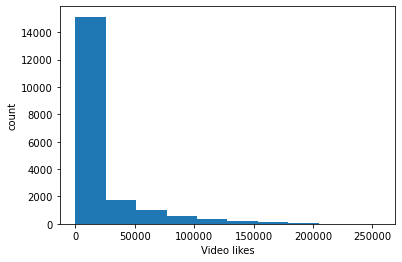

In [87]:
# Create a histogram
### YOUR CODE HERE ###
plt.hist(dataNA['video_share_count'])


plt.xlabel('Video likes')
plt.ylabel('count')
plt.show()

**Question:** What do you notice about the distribution of this variable?

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

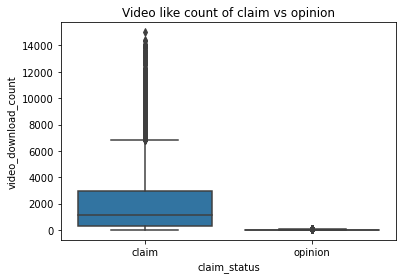

In [88]:
# Create a boxplot to visualize distribution of `video_download_count`
### YOUR CODE HERE ###
sns.boxplot(x=dataNA['claim_status'],
            y=dataNA['video_download_count'],
            showfliers=True)
plt.title('Video like count of claim vs opinion')
plt.show()

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

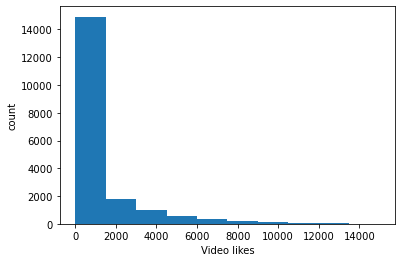

In [89]:
# Create a histogram
### YOUR CODE HERE ###
plt.hist(dataNA['video_download_count'])


plt.xlabel('Video likes')
plt.ylabel('count')
plt.show()

**Question:** What do you notice about the distribution of this variable?

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

[]

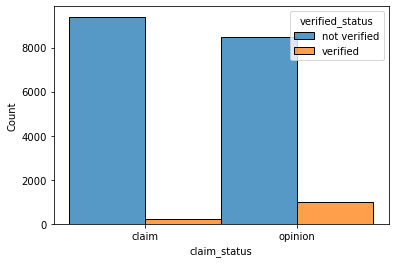

In [57]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(x=data['claim_status'],
            
            hue=data['verified_status'],
            multiple='dodge')
plt.plot()

In [99]:
data.value_counts("claim_status")

claim_status
claim      9608
opinion    9476
dtype: int64

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?
sligthly more likely

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

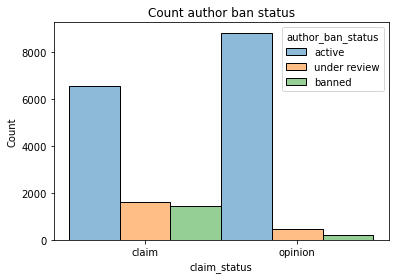

In [61]:
# Create a histogram
### YOUR CODE HERE ###
sns.histplot(x=data['claim_status'],hue=data['author_ban_status'], multiple='dodge', alpha=0.5,hue_order=['active', 'under review', 'banned'])

plt.title('Count author ban status')
plt.show();

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

[]

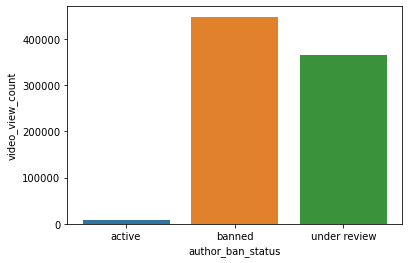

In [62]:
# Create a bar plot
### YOUR CODE HERE ###

ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

sns.barplot(data=ban_status_counts, x='author_ban_status',
            y='video_view_count',
            )
plt.plot()

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

High views probably banned creator

In [131]:
# Calculate the median view count for claim status.
### YOUR CODE HERE ###

claimData = data[claim]
opinionData = data[opinion]
print("Claim video median views: " + str(claimData['video_view_count'].median()))
print("Opinion video median views: " + str(opinionData['video_view_count'].median()))

Claim video median views: 501555.0
Opinion video median views: 4953.0


In [140]:
### YOUR CODE HERE ###
claim_count = claimData['video_view_count'].sum()
opinion_count = opinionData['video_view_count'].sum()

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

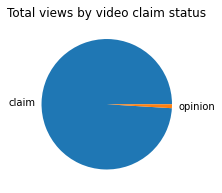

In [63]:
# Create a pie graph
### YOUR CODE HERE ###

fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');


**Question:** What do you notice about the overall view count for claim status?

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [51]:
### YOUR CODE HERE ###
values = ([data['video_view_count'], data['video_like_count'], data['video_share_count'], data['video_download_count'], data['video_comment_count']])

for value in values:
    percentile25 = value.quantile(0.25)
    percentile75 = value.quantile(0.75)
    iqr = percentile75 - percentile25
    median_value = value.median()
    outlier_threshold = median_value + (1.5 * iqr)
    over_threshold = value > outlier_threshold
    print('Number of outliers, ' + value.name + ': ' + str(data[over_threshold].shape[0]))

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


#### **Scatterplot**

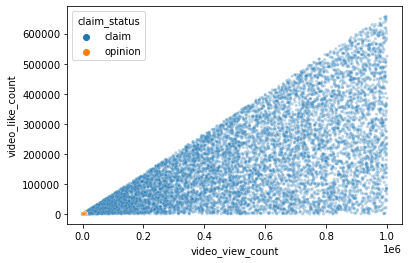

In [64]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()


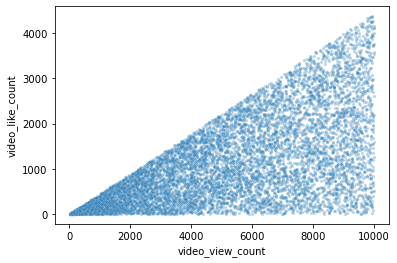

In [67]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
### YOUR CODE HERE ###
opinion_df = data[opinion]
sns.scatterplot(x=opinion_df['video_view_count'], y=opinion_df['video_like_count'], s=10, alpha=.3)


In [54]:
opinion_df

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
9608,9609,opinion,2200945278,32,i think that humans will live on mars by 2035,not verified,active,5433.0,1602.0,381.0,12.0,1.0
9609,9610,opinion,1670297626,22,i think that we will all fly with individual j...,verified,active,6748.0,2373.0,387.0,37.0,4.0
9610,9611,opinion,4356008348,18,i think that drone deliveries are already happ...,verified,active,5890.0,1501.0,580.0,24.0,1.0
9611,9612,opinion,4285230093,39,i think that there are more microorganisms in ...,not verified,active,642.0,49.0,5.0,0.0,0.0
9612,9613,opinion,5927475305,45,i think that dubai is an island created by humans,not verified,active,7185.0,1771.0,577.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0


You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.